# <center>  MIT 8.02 ESG  - RC  circuits exploration </center>

# Learning Objectives

OF THE MAIN TASKS

-	To be able to include capacitors as circuit elements, and to know how the electric potential changes across capacitors.
-	To comprehend the nature of the differential equation describing a charging and discharging capacitor
-	To be able to explain the meaning of the RC time constant 
- To appreciate that although mathematically it takes an infinite amount of time for a capacitor to fully charge/discharge, in practice it always takes some finite amount of time

OF THE OPTIONAL TASKS

-	To be able to explain the power balance in a circuit where a capacitor is charging and in a circuit where it is discharging.
- To think critically about the assumptions in the analytical solution, in the code and to relate it to what happens in real life



# Charging and discharging capacitors exploration

In this activity you will use your physics knowledge to complete and modify a code that describes a charging (switch in position A) and discharging (switch in position B) capacitor.  You will then explore how charge (q) and current (I) vary as a function of time.

<center>
<figure>
<img src="images/rc_all.png" width=600 />
<figcaption>Fig.1 - Charging and discharging a capacitor.</figcaption>
</figure>
</center>

# Task 1 - on a piece of paper - finding the differential equations 

Before you write a code it is important to understand what you are trying to do. This part will guide you to find the differential equations for the  charge (q) and current (I). <br> 

<h2> Charging capacitor </h2>

The switch in Figure 1 is flipped to the left (charging capacitor). For simplicity, we copied the closed loop in Figure 2.

<center>
<figure>
<img src="images/rc_charge.png" width=400 />
<figcaption>Fig.2 - Charging a capacitor.</figcaption>
</figure>
</center>    

The gray arrows represent the directions we chose (they are arbitrary!) for the positive current and for the calculation of potential differences.

<b> For the circuit in Figure 2: </b>

1. Write the relationship between the current I and the charge q on the positive plate 
2. Use the loop rule to find an expression for $\frac{dq}{dt}$ in terms if $R_1$ , C, $V_b$, q as needed.

<h2> Discharging capacitor </h2>    
    
Now the switch in Figure 1 is flipped to the right (discharging capacitor). For simplicity, we copied the closed loop in Figure 3.

<center>
<figure>
<img src="images/rc_discharge.png" width=400 />
<figcaption>Fig.3 - Discharging a capacitor.</figcaption>
</figure>
</center> 

<b> For the circuit in Figure 3: </b>

1. Write the relationship between the current I and the charge q on the positive plate 
2. Use the loop rule to find an expression for $\frac{dq}{dt}$ in terms if $R_2$ , C, $V_b$, q as needed.



# Task 2 - write the code 

Use your results from Task 1 to complete the functions <b> dq_dt </b> and <b>current </b>. Read the functions descriptions (in red below)!


In [ ]:
## YOUR TURN: COMPLETE the functions below and run this cell

# dq/dt equation 

def dq_dt(q,R,C,vb):
        """This function takes the floats q, R, C, vb as arguments and
        it returns the value of dq/dt (float). 
        """
        # Comment : below we assign dq/dt = rhs, where rhs stands for righ-hand side of the equation
        # Hint: the expression you write has to be valid for charging and discharging
        # capacitors. For a discharging capacitor we will set vb = 0 when we call the function 
        # You do not need to worry about it here!
        
        #rhs = FILL IN dq/dt for GIVEN q, R, C, vb  
        
        rhs = -q/(R*C) + vb/R
        return(rhs)
    
# Relationship between positive current and dq/dt

def current(dq_dt, charging):
        """This function takes the float dq/dt and the boolean charging (which can be True
        or False) as arguments and
        it returns the positive current (float). 
        """

        if charging == True:
            #I = FILL IN I for given dq_dt
            I = + dq_dt # the current adds charge to the positive plate
        else:
            #I = FILL IN I for given dq_dt
            I = - dq_dt   # the current removes charge from the positive plate 
            
        return I

Once you complete and run the cell above, run the cell below. Without editing it. The red line is the result from the numerical integration that uses the functions you wrote for a charging capacitor. It should go through the analytical solution (blue dots). If you get an error or you get a red curve that doesn't match the blue dots, review Task 1 and your functions with a peer or with an instructor.

In [ ]:
## YOUR TURN: Run this cell

from RC_solve import *

# Constants
R_1 = 100e3 # ohm
C = 10e-6 # farad
vb = 5 # battery emf, in Volt

# Time
ti = 0 # initial time, in seconds
tf = 5 # final time, in seconds
dt = 0.02 # s. Infinitesimal time interval used for the numerical integration


# Initial conditions
qi = 0 # initial charge in C

# vb has been assigned above
# Call the function that calculate Q and I as a function of time
ts,qs,Is = solve_charge_current (R_1, C, vb, qi, ti, tf, dt,dq_dt, current)

qa,Ia = analytical_sol (R_1, C, vb, qi, ti, tf, dt, charging  = True)   

# Plot Q and I as a function of time. The red line is the numerical result that uses
# functions you wrote
plot_Q_I(ts,qs,Is,qa,Ia)

You can now run the cell below, without editing it. The red line is the result from the numerical integration that uses the functions you wrote for a discharging capacitor. It should go through the analytical solution (blue dots). If you get an error or you get a red curve that doesn't match the blue dots, review Task 1 and your functions with a peer or with an instructor. <br> 
<b> Take snapshots of your output for both charging and discharging capacitors, and add them to your notes for Task 1. </b>

In [ ]:
## YOUR TURN: Run this cell

# Constants
R_2 = 100e3 # ohm

# Initial conditions
qi = 5

# Call the function that calculate Q and I as a function of time
ts2,qs2,Is2 = solve_charge_current (R_2, C, vb, qi, ti, tf, dt,dq_dt, current,charging  = False)

qa2,Ia2 = analytical_sol (R_2, C, vb, qi, ti, tf, dt, charging  = False)   

# Plot Q and I as a function of time. The red line is the numerical result that uses
# functions you wrote
plot_Q_I(ts2,qs2,Is2,qa2,Ia2)

# Task 3 - When is the capacitor fully charged/discharged?

In the reading we learned that the characteristic time for charging/discharging a capacitor is given by $\tau = RC$ ($\tau$ is the greek letter tau). A real life example is when you unplug a wireless router to reset it: the capacitors in the device do not discharge instantaneosly, it takes a finite amout of time. That is why you need to wait tens of seconds before plugging in the router again. <br>

How do we decide how long to wait? When is the capacitor truly discharged? If you look at the charge plot, you notice that the charge approaches zero asymptotically, it is never exactly zero. A better question would be: when is the positive charge 1% of the initial charge qi? <br>

Let's start by defining the time constant tau for the circuit in Fig. 3: write it in the cell below and run the cell to see how long is tau.

In [ ]:
## YOUR TURN: complete and run this cell

# tau  = FILL in with characteristic time in s for the circuit in Fig. 3
tau  = R_2*C # characteristic time in s

print("tau is",tau,"s")

In order to find when approximately the charge is 1% of the initial value, we  use an inefficient but simple algorithm, called  exhaustive enumeration algorithm (or also brute force).
The algorithm checks iteratively the value of q(t)/q(0) in the numerical solution starting at ti (index i=0), until q(t)/q(0) becomes smaller than 1%. When this condition is satisfied, the code exits the loop, and we have the index that gives the approximate time. Run the cell below and read the output.

In [ ]:
## YOUR TURN: Run this cell

epsilon  = 0.01
i = 0

while abs(qs2[i]/qs2[0]) > epsilon:
                              i+=1
        
print("At time", round(ts[i],2),"s the charge on the positive plate is", round(qs2[i]/qs2[0]*100,2), 
      "% the initial charge. For practical purposes this time is what we consider infinite!")  


<b>Use the results above</b>

1. to calculate how many tau approximately it takes to discharge the capacitor in Fig. 3, where we define a capacitor to be discharged if the charge is about 1% of the initial value. 
2. to calculate when the capacitor in Fig. 2 is fully charged or better, when  its charge is about 99% of the maximum theoretical charge ($Q_{max} = $ = C vb). You can address this answer on a piece of paper or writing a brute force search similar to the example above. Use the method you prefer !
3. Discuss how you would proceed to approximately measure the time constant of an RC circuit $\tau$ using a voltmeter and a timer.

In [ ]:
## SOLUTION

epsilon  = 0.01
Qmax = C*vb
i = 0

while abs((Qmax-qs[i])/Qmax) > epsilon:
                              i+=1
        
print("At time", round(ts[i],2),"s the charge on the positive plate is", round(qs[i]/Qmax*100,2), 
      "% the maximum charge. For practical purposes this time is what we consider infinite!")  


# Task 4 - Explore the solutions

What happens when the time constant changes? Run the cell below: it will produce an interactive output for a discharging capacitor. Change the resistance and capacitance in the interactive plot below to see the effect on the time it takes to discharge the capacitor.

STILL TODO:
2. Include reference where charge is 1% of qi
3. include toggle button for charge/discharge?

<IPython.core.display.Javascript object>


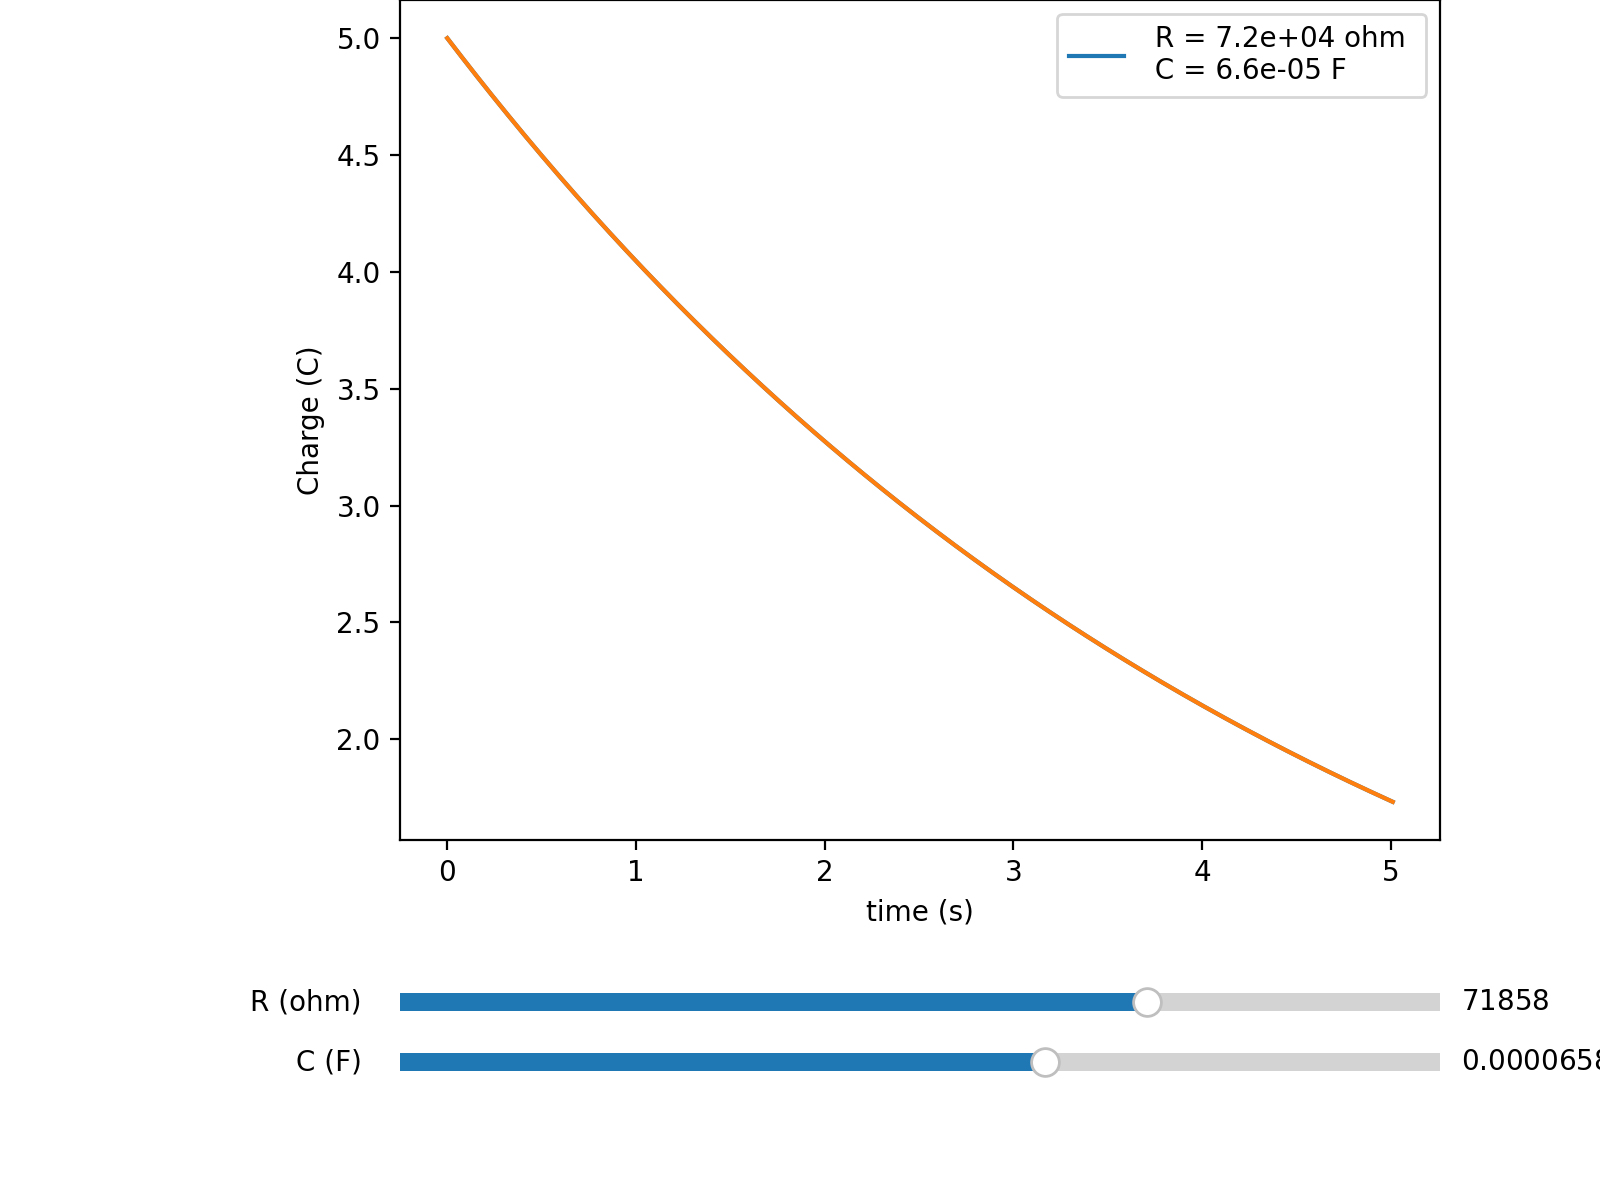

In [5]:
%run ./hidden_RC_widget.ipynb
RC_widget() 

# Optional task - Power balance in the circuit



# Optional dive in : numerical integration

### Euler-Cromer intregration

# Convergence



Convergence applet 

In [ ]:
# Initial Value Problem
# Capacitor charging using Euler's method.
# Convergence applet.

# Setup: we have a battery in series with
# a switch, a resistor, and a capacitor.

# 2022 Christian Cardozo
# cica@mit.edu


import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

class Globals():
    def __init__(self):
        self.num_plots = 0
        self.max_plots = 10
        self.dt_prev = None

g = Globals()

# Make the graph region of the GUI.
fig1, ax1 = plt.subplots(figsize=(8,6))

# Make two plots
plot1 = plt.subplot(1,1,1)

# Make a slider for dt
dt_slider_ax = plt.axes([0.2,0.015,0.6,0.025])
dt_slider = Slider(dt_slider_ax,'dt (s)  ',valmin=1e-1,valmax=1e0,valinit=1e0)
dt_slider.vline.set_visible(False)

# Clear plots and reset titles
def plotconf():
    plot1.cla()
    plot1.set_xlabel('time (s)')
    plot1.set_ylabel('Charge (C)')
    plot1.set_title('Charging a Capacitor')
    # Print a little spacer in the terminal output
    print('--------')

# dq/dt equation
def dq_dt(q,r,c,vb):
        result = -q/(r*c) + vb/r
        return(result)

# Constants
r = 100e3 # resistance, in ohms
c = 10e-6 # capacitance, in farads
vb = 5 # battery potential, in volts

def update(dummy):

    # Use the dt slider value as dt
    dt = dt_slider.val # timestep size, in seconds
    dt = round(dt,2)
    if dt != g.dt_prev:
        g.dt_prev = dt
    else:
        return

    # Clear plots and reset titles,
    # if user has plotted max_plots plots
    g.num_plots += 1
    if g.num_plots > g.max_plots:
        plotconf()
        g.num_plots = 0

    ##################
    # Charging.
    # The switch is initially open
    # and the capacitor has no charge.
    # We will now close the switch.

    # Time
    ti = 0 # initial time, in seconds
    tf = 5 # final time, in seconds

    num_steps = int((1/dt)*(tf-ti))

    # Initial charge
    q = 0
    t = ti

    ts = [t]
    qs = [q]

    while t < tf:
        # Update values
        q = q + dt * dq_dt(q,r,c,vb) # Euler
        t += dt # increment time
        ts.append(t) # append time to list
        qs.append(q) # append charge to list

    # Plot all the values!
    # plot1.scatter(ts,qs)#,c='r',s=6)
    plot1.plot(ts,qs,label='dt = '+str(round(dt,2)))#,c='r')
    plot1.legend()




dt_slider.on_changed(update)
update(0)
plt.show()


# References

Christopher Orban, "Charging/Discharging RC circuits," Published in the PICUP Collection, June 2017, https://doi.org/10.1119/PICUP.Exercise.RC (https://www.compadre.org/PICUP/exercises/exercise.cfm?A=RC)

https://www.ippp.dur.ac.uk/~krauss/Lectures/NumericalMethods/index.html

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/


In [ ]:
# How to make an interactive plot with sliders

# Import other libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
 
# Create subplot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35)
 
# Create and plot sine wave
t = np.arange(0.0, 1.0, 0.001)
s = 5 * np.sin(2 * np.pi * 3 * t)
l, = plt.plot(t, s)
 
# Create axes for frequency and amplitude sliders
axfreq = plt.axes([0.25, 0.15, 0.65, 0.03])
axamplitude = plt.axes([0.25, 0.1, 0.65, 0.03])
 
# Create a slider from 0.0 to 20.0 in axes axfreq
# with 3 as initial value
freq = Slider(axfreq, 'Frequency', 0.0, 20.0, 3)
 
# Create a slider from 0.0 to 10.0 in axes axfreq
# with 5 as initial value and valsteps of 1.0
amplitude = Slider(axamplitude, 'Amplitude', 0.0,
                   10.0, 5, valstep=1.0)
 
# Create function to be called when slider value is changed
 
def update(val):
    f = freq.val
    a = amplitude.val
    l.set_ydata(a*np.sin(2*np.pi*f*t))
 
# Call update function when slider value is changed
freq.on_changed(update)
amplitude.on_changed(update)


# Create axes for reset button and create button
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])  # Must edit this part
button = Button(resetax, 'Reset', color='gold',
                hovercolor='skyblue')

# Create a function resetSlider to set slider to
# initial values when Reset button is clicked
 
def resetSlider(event):
    freq.reset()
    amplitude.reset()

 
# Call resetSlider function when clicked on reset button
button.on_clicked(resetSlider)

 
# display graph
plt.show()